<a href="https://colab.research.google.com/github/bsaha205/asd/blob/main/ASD_clustering_Children.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading dataset
ch = pd.read_csv("/content/drive/MyDrive/Autism_disorder/Autism-Child-Data.csv",na_values=['?'])

In [ ]:
#Child
ch.sample(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
54,1,0,1,1,0,1,0,0,0,1,...,m,NaN,no,no,'United Arab Emirates',no,5,'4-11 years',NaN,NO
194,1,1,0,0,1,1,1,0,0,0,...,m,NaN,no,no,Iraq,no,5,'4-11 years',NaN,NO
250,0,1,0,1,1,1,1,1,0,1,...,m,'Middle Eastern ',yes,no,Egypt,no,7,'4-11 years',Parent,YES
281,0,1,1,1,1,1,0,0,0,1,...,m,White-European,no,no,Australia,no,6,'4-11 years',Parent,NO
117,1,1,0,1,0,1,0,0,1,1,...,f,White-European,no,no,'United States',no,6,'4-11 years',Parent,NO


In [ ]:
# Number of tuples and fields
print("Child      :",ch.shape)

Child      : (292, 21)


In [ ]:
#Child
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         292 non-null    int64  
 1   A2_Score         292 non-null    int64  
 2   A3_Score         292 non-null    int64  
 3   A4_Score         292 non-null    int64  
 4   A5_Score         292 non-null    int64  
 5   A6_Score         292 non-null    int64  
 6   A7_Score         292 non-null    int64  
 7   A8_Score         292 non-null    int64  
 8   A9_Score         292 non-null    int64  
 9   A10_Score        292 non-null    int64  
 10  age              288 non-null    float64
 11  gender           292 non-null    object 
 12  ethnicity        249 non-null    object 
 13  jundice          292 non-null    object 
 14  austim           292 non-null    object 
 15  country_of_res   292 non-null    object 
 16  used_app_before  292 non-null    object 
 17  result          

In [ ]:
#Child
ch.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,6.239726
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.365456,2.284882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


In [ ]:
#Total number of missing values in each dataset
print("Total no. of missing values in Child dataset     : ",ch.isnull().sum().sum())

Total no. of missing values in Child dataset     :  90


In [ ]:
#Child
ch.isnull().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


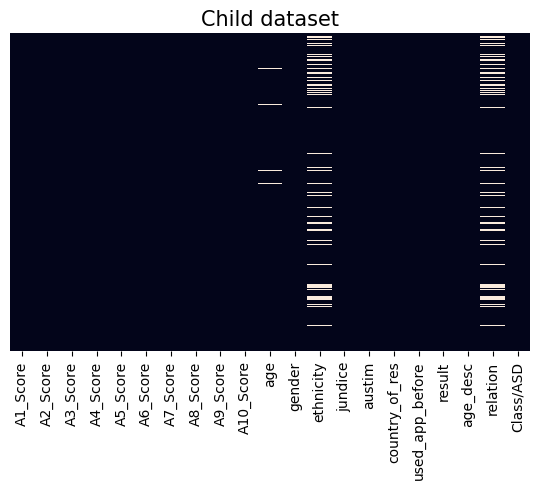

In [ ]:
fig, ax = plt.subplots(figsize=(5.5,5))

sns.heatmap(ch.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax)
ax.set_title("Child dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('heatmap_ch.pdf', transparent=True, dpi=300)

In [ ]:
#ASD or Not
print("\nNo of chlts diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'YES']))
print("No of chlts not diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'NO']))


No of chlts diagonised with ASD =  141
No of chlts not diagonised with ASD =  151


In [ ]:
# #Data distribution
# fig, ax = plt.subplots(figsize=(5, 5))
# sns.countplot(ch['Class/ASD'],ax=ax)
# ax.set_title("Child dataset",fontsize = 15)
# fig.tight_layout()
# plt.savefig('distribution_ch.pdf', transparent=True, dpi=300)

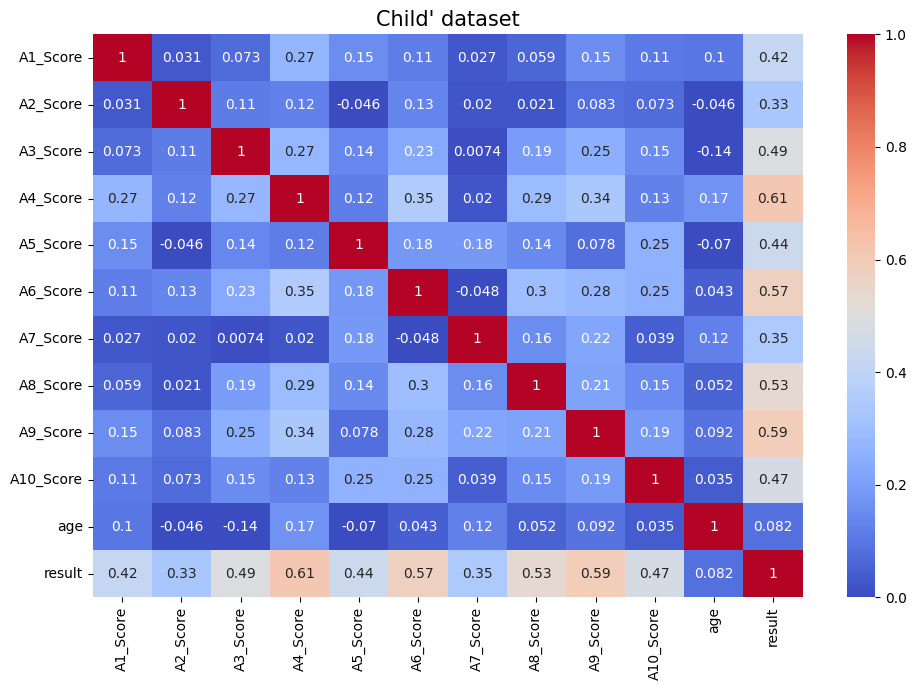

In [ ]:
ch_numeric = ch.select_dtypes(include=['int64', 'float64'])

# Plot heatmap for the chlts' dataset
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(ch_numeric.corr(), annot=True, cmap='coolwarm', vmin=0, vmax=1, ax=ax)  # Still using vmin=0, vmax=1 as per your original code
ax.set_title("Child' dataset", fontsize=15)

# Adjust layout
fig.tight_layout()

# Save the figure
plt.savefig('correlation_ch.pdf', transparent=True, dpi=300)

plt.show()

In [ ]:
#Number of missing values in each dataset
print("No of missing values in Child dataset      = ",ch.isnull().sum().sum())

No of missing values in Child dataset      =  90


In [ ]:
#Imputing missing values of categorical features with mode
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

ch.ethnicity = imputer_mode.fit_transform(ch.ethnicity.values.reshape(-1,1))[:,0]
ch.relation = imputer_mode.fit_transform(ch.relation.values.reshape(-1,1))[:,0]

#Imputing missing values of numerical features with mean
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='mean')
ch.age = imputer_mode.fit_transform(ch.age.values.reshape(-1,1))[:,0]

In [ ]:
print("After imputing,\nNo of missing values in Child dataset      = ",ch.isnull().sum().sum())

After imputing,
No of missing values in Child dataset      =  0


In [ ]:
#Since age of toddlers are represented in months, age(in years) of chlts is converted to age in months.
ch.rename(columns = {'age':'Age_Mons'}, inplace = True)

ch['Age_Mons'] = ch['Age_Mons']*12

In [ ]:
#Making classes of categorical variables same for all datasets
ch['ethnicity'] = ch['ethnicity'].replace('Others','others')

### **Model fitting**

*Spliting dependent and independent features*


In [ ]:
shuffled_data = ch.sample(frac=1, random_state=4)

# Separate ASD and non-ASD data
ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'YES']
non_ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'NO']

# Adjust sample size to available data
n_sample = min(151, len(non_ASD_data))  # Take min between 151 and actual count
non_ASD_data = non_ASD_data.sample(n=n_sample, random_state=4)

# Concatenate balanced dataset
ch_balanced = pd.concat([ASD_data, non_ASD_data])

# Shuffle again after balancing
ch_balanced = ch_balanced.sample(frac=1, random_state=4).reset_index(drop=True)

print(ch_balanced['Class/ASD'].value_counts())  # Check distribution


Class/ASD
NO     151
YES    141
Name: count, dtype: int64


In [ ]:
# Split the data into features and target label
raw_target= ch['Class/ASD']
raw_features = ch[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','Age_Mons', 'gender', 'ethnicity', 'jundice', 'austim', 'country_of_res','relation']]

*Feature Scaling*

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_features = ['Age_Mons']

features_minmax_transform = pd.DataFrame(data = raw_features)
features_minmax_transform[num_features] = scaler.fit_transform(raw_features[num_features])

In [ ]:
features_minmax_transform.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,gender,ethnicity,jundice,austim,country_of_res,relation
0,1,1,0,0,1,1,0,1,0,0,0.285714,m,others,no,no,Jordan,Parent
1,1,1,0,0,1,1,0,1,0,0,0.285714,m,'Middle Eastern ',no,no,Jordan,Parent
2,1,1,0,0,0,1,1,1,0,0,0.285714,m,White-European,no,no,Jordan,Parent
3,0,1,0,0,1,1,0,0,0,1,0.142857,f,White-European,yes,no,Jordan,Parent
4,1,1,1,1,1,1,1,1,1,1,0.142857,m,others,yes,no,'United States',Parent


##Encoding Categorical variables

In [ ]:
features = pd.get_dummies(features_minmax_transform)
print('features.shape:', features.shape)

features.shape: (292, 84)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(raw_target)
print('target.shape:', target.shape)

target.shape: (292,)


*Function for Evaluation*

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, roc_curve, auc, log_loss

def model_report(y_act, y_pred):
    print("Accuracy = ", accuracy_score(y_act, y_pred))
    print("Precision = " ,precision_score(y_act, y_pred))
    print("Recall\Sensitivity = " ,recall_score(y_act, y_pred))
    confusion = metrics.confusion_matrix(y_act, y_pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    specificity = TN / (TN + FP)
    print("Specificity = " ,specificity)
    print("F1 Score = " ,f1_score(y_act, y_pred))

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_act, y_pred)
    print("AUC Score =", auc(false_positive_rate, true_positive_rate))
    print("Kappa score = ",cohen_kappa_score(y_act,y_pred))
    print("Log Loss = " ,log_loss(y_act, y_pred),"\n")


In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt


##Spliting Data


In [ ]:
X = features
y = target

print('X.shape:', X.shape)
print('y.shape:', y.shape)
# print('X:', X)

X.shape: (292, 84)
y.shape: (292,)


## Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# One-hot encoding categorical features
features = pd.get_dummies(features_minmax_transform)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(raw_target)

# Train Random Forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(features, y)

# Select top features based on importance
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order

# Select top `k` features
k = 15  # Adjust as needed
selected_features = features.columns[sorted_indices[:k]]

# Create a DataFrame to store feature names and their importance scores
feature_scores = pd.DataFrame({
    'Feature': features.columns,
    'Importance Score': feature_importances
})

# Sort by importance score in descending order
feature_scores = feature_scores.sort_values(by='Importance Score', ascending=False)

# Print top k features with their scores
print(feature_scores.head(k))

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# One-hot encoding categorical features
features = pd.get_dummies(features_minmax_transform)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(raw_target)

# Train Random Forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(features, y)

# Select top features based on importance
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order

# Select top `k` features
k = 15  # Adjust as needed
selected_features = features.columns[sorted_indices[:k]]

# Create a DataFrame to store feature names and their importance scores
feature_scores = pd.DataFrame({
    'Feature': features.columns,
    'Importance Score': feature_importances
})

# Sort by importance score in descending order
feature_scores = feature_scores.sort_values(by='Importance Score', ascending=False)

# Print top k features with their scores
print(feature_scores.head(k))

actual_selected_features = ["A4_Score",
    "A9_Score","A8_Score", "A1_Score", "A10_Score", "A3_Score",
    "A5_Score", "A6_Score","A7_Score","Age_Mons","A2_Score"]

# Ensure selected features exist in the DataFrame
existing_features = [f for f in actual_selected_features if f in features.columns]

# Initialize X with selected features
X = features[existing_features]
y = ch['Class/ASD']
existing_features = [f for f in actual_selected_features if f in features.columns]

# Initialize X with selected features
X = features[existing_features]
y = ch['Class/ASD']

                           Feature  Importance Score
3                         A4_Score          0.116737
8                         A9_Score          0.091167
7                         A8_Score          0.091151
0                         A1_Score          0.076118
9                        A10_Score          0.072645
4                         A5_Score          0.059806
2                         A3_Score          0.058306
5                         A6_Score          0.055125
10                        Age_Mons          0.047771
6                         A7_Score          0.035884
1                         A2_Score          0.033002
36  country_of_res_'United States'          0.019486
21        ethnicity_White-European          0.016052
11                        gender_f          0.012804
12                        gender_m          0.011558
                           Feature  Importance Score
3                         A4_Score          0.116737
8                         A9_Score          0.

In [ ]:
print('X.shape:', X.shape)
print('y.shape:', y.shape)
print('X:', X)

X.shape: (292, 11)
y.shape: (292,)
X:      A4_Score  A9_Score  A8_Score  A1_Score  A10_Score  A3_Score  A5_Score  \
0           0         0         1         1          0         0         1   
1           0         0         1         1          0         0         1   
2           0         0         1         1          0         0         0   
3           0         0         0         0          1         0         1   
4           1         1         1         1          1         1         1   
..        ...       ...       ...       ...        ...       ...       ...   
287         1         1         1         1          1         1         1   
288         0         0         0         1          1         0         1   
289         1         0         0         1          1         1         1   
290         0         1         1         1          1         1         1   
291         0         0         0         0          0         1         1   

     A6_Score  A7_Score  

In [ ]:
#Splitting the data into train test spit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## Clustering


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import contingency_matrix

In [ ]:
def plot_tsne(data, cluster_labels):
    tsne = TSNE(n_components=2, random_state=42)
    data_2d = tsne.fit_transform(data)

    plt.figure(figsize=(7, 6))
    for cluster in np.unique(cluster_labels):
        plt.scatter(data_2d[cluster_labels == cluster, 0],
                    data_2d[cluster_labels == cluster, 1],
                    label=f'Cluster {cluster}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title('t-SNE Cluster Visualization')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.metrics.cluster import contingency_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_contingency_matrix(true_labels, predicted_clusters):
    """
    Plots a heatmap of the contingency matrix between true labels and predicted clusters.
    """
    cm = contingency_matrix(true_labels, predicted_clusters)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f'Cluster {i}' for i in range(cm.shape[1])],
                yticklabels=[f'True {i}' for i in range(cm.shape[0])])
    plt.xlabel('Predicted Cluster')
    plt.ylabel('True Label')
    plt.title('Contingency Matrix Heatmap')
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, silhouette_score

def calculate_scores(data, label_true, label_pred, algo_name):
    sc_euclidean = silhouette_score(data, label_pred, metric='euclidean')
    nmi = normalized_mutual_info_score(label_true, label_pred)
    ari = adjusted_rand_score(label_true, label_pred)

    print(f"{algo_name} :: NMI: {nmi:.4f}, ARI: {ari:.4f}, SC: {sc_euclidean:.4f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_init': 20, 'n_clusters': 2, 'max_iter': 500, 'init': 'random', 'algorithm': 'lloyd'}


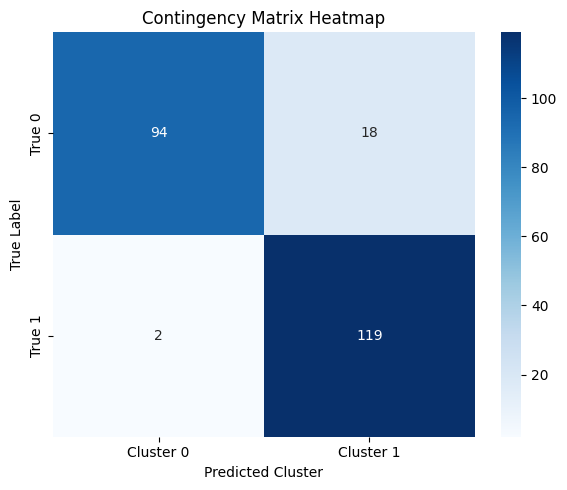


Silhouette Score: 0.1829


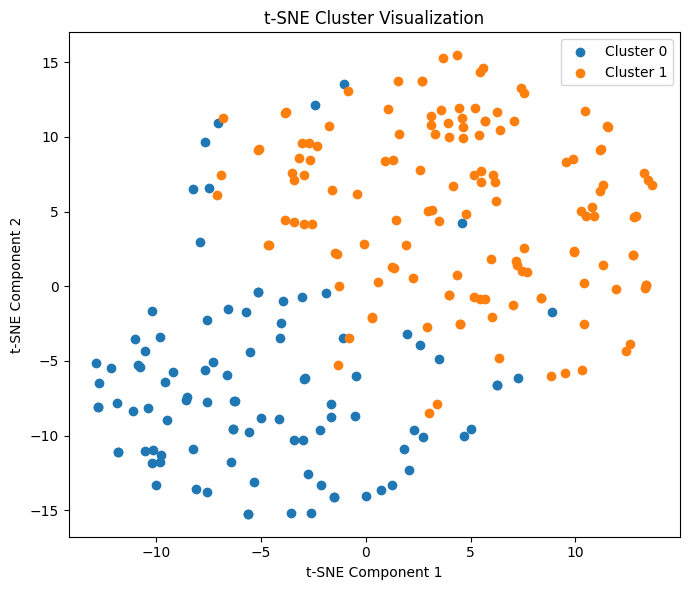

KMeans :: NMI: 0.6160, ARI: 0.6848, SC: 0.1829


In [ ]:
from sklearn.cluster import KMeans
# ---------- STEP 1: Setup RandomizedSearchCV for KMeans ----------
param_dist = {
    'n_clusters': [2],  # Fixed to 2 for ASD vs non-ASD
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 50],
    'max_iter': [300, 500, 1000],
    'algorithm': ['lloyd', 'elkan']
}

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

kmeans = KMeans()
random_search = RandomizedSearchCV(
    kmeans,
    param_distributions=param_dist,
    n_iter=10,
    scoring=silhouette_scorer,
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# ---------- STEP 2: Fit KMeans with best parameters ----------
km = KMeans(**best_params)
kmeans_labels = km.fit_predict(X_train)

# ---------- STEP 3: Evaluate Clustering ----------
# Contingency matrix (true labels vs predicted clusters)
contingency = plot_contingency_matrix(y_train, kmeans_labels)

# Silhouette score (just as additional validation)
sil_score = silhouette_score(X_train, kmeans_labels)
print(f"\nSilhouette Score: {sil_score:.4f}")

# ---------- STEplot_tsneNE Visualization ----------plot_tsnene(X_tplot_tsneeans_lplot_tsnealculate_scoplot_tsneain, y_train, kmeans_labels, 'KMeans')
plot_tsne(X_train, kmeans_labels)
calculate_scores(X_train, y_train, kmeans_labels, 'KMeans')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_clusters': 2, 'metric': 'euclidean', 'linkage': 'ward'}


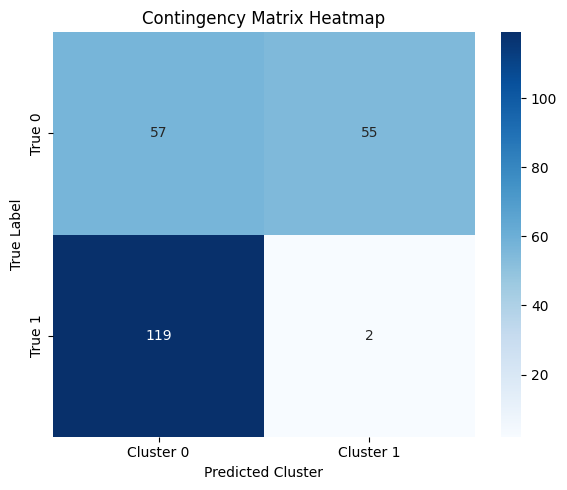


Silhouette Score: 0.1747


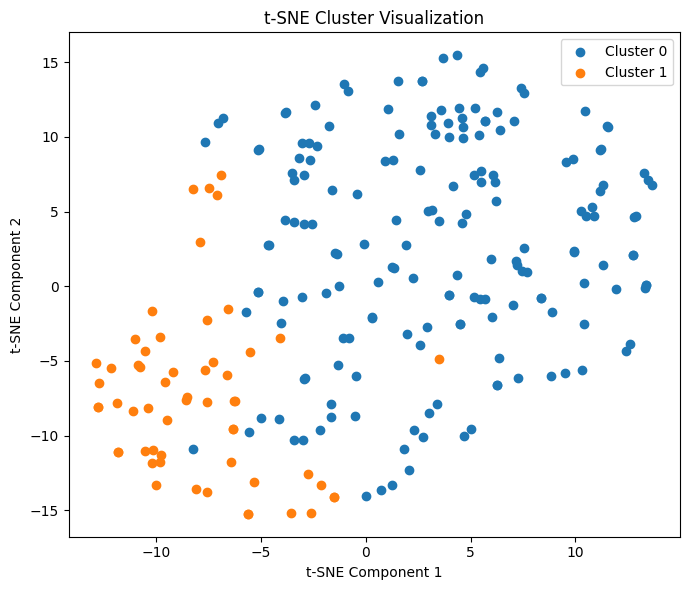

Agglomerative Clustering :: NMI: 0.2875, ARI: 0.2409, SC: 0.1747


In [ ]:

# ---------- STEP 1: Setup RandomizedSearchCV for Agglomerative Clustering ----------

param_dist = {
    'n_clusters': [2],  # Fixed for ASD vs non-ASD
    'linkage': ['ward', 'complete', 'average'],
    'metric': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
}

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

agglo = AgglomerativeClustering()

random_search = RandomizedSearchCV(
    agglo,
    param_distributions=param_dist,
    n_iter=10,
    scoring=silhouette_scorer,
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# ---------- STEP 2: Fit Agglomerative Clustering with best parameters ----------

best_agglo = AgglomerativeClustering(
    n_clusters=best_params['n_clusters'],
    linkage=best_params['linkage'],
    metric=best_params['metric']
)

agglo_labels = best_agglo.fit_predict(X_train)

# ---------- STEP 3: Evaluate Clustering ----------

contingency = plot_contingency_matrix(y_train, agglo_labels)
sil_score = silhouette_score(X_train, agglo_labels)
print(f"\nSilhouette Score: {sil_score:.4f}")

# ---------- STEP 4: t-SNE Visualization ----------

plot_tsne(X_train, agglo_labels)

# ---------- STEP 5: Metric Evaluation ----------

calculate_scores(X_train, y_train, agglo_labels, 'Agglomerative Clustering')


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_clusters': 2, 'gamma': 1, 'affinity': 'rbf'}


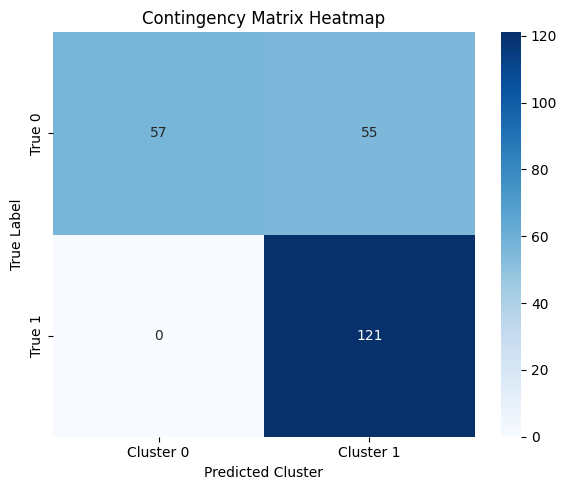


Silhouette Score: 0.1931


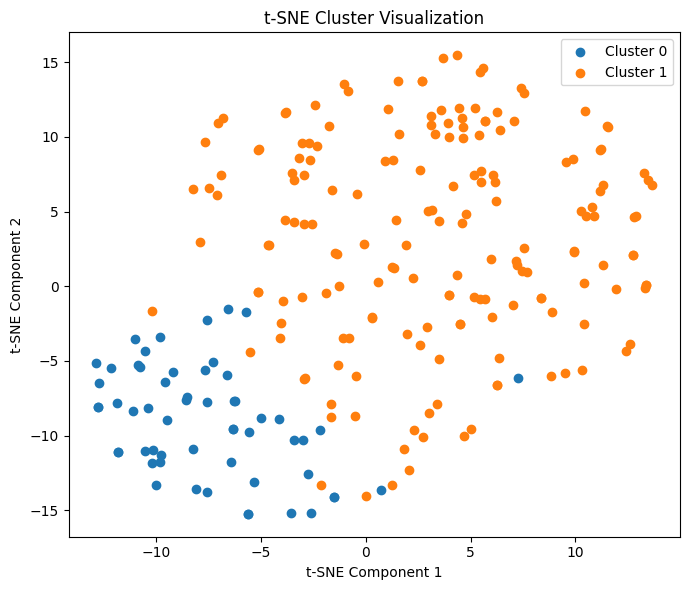

Spectral Clustering :: NMI: 0.3576, ARI: 0.2761, SC: 0.1931


In [ ]:
from sklearn.cluster import SpectralClustering

# ---------- STEP 1: Setup RandomizedSearchCV for Spectral Clustering ----------

param_dist = {
    'n_clusters': [2],
    'affinity': ['nearest_neighbors', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

spectral = SpectralClustering()

random_search = RandomizedSearchCV(
    spectral,
    param_distributions=param_dist,
    n_iter=10,
    scoring=silhouette_scorer,
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# ---------- STEP 2: Fit Spectral Clustering with best parameters ----------

best_model = SpectralClustering(
    n_clusters=best_params['n_clusters'],
    affinity=best_params['affinity'],
    gamma=best_params['gamma'],
    random_state=42
)

spectral_labels = best_model.fit_predict(X_train)

# ---------- STEP 3: Evaluate Clustering ----------

contingency = plot_contingency_matrix(y_train, spectral_labels)
sil_score = silhouette_score(X_train, spectral_labels)
print(f"\nSilhouette Score: {sil_score:.4f}")

# ---------- STEP 4: t-SNE Visualization ----------

plot_tsne(X_train, spectral_labels)

# ---------- STEP 5: Metric Evaluation ----------
calculate_scores(X_train, y_train, spectral_labels, 'Spectral Clustering')


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'threshold': 0.1, 'n_clusters': 2, 'branching_factor': 200}


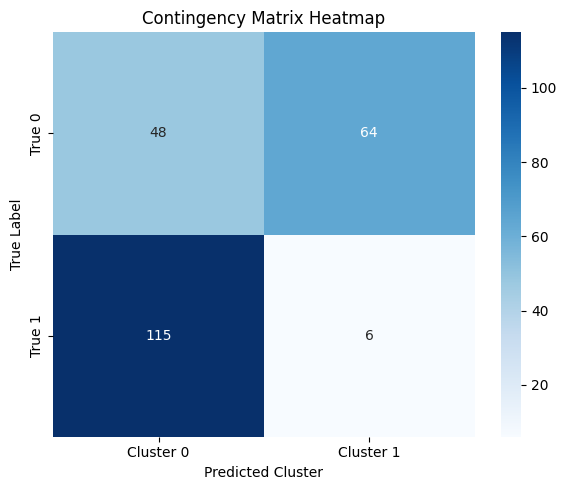


Silhouette Score: 0.1689


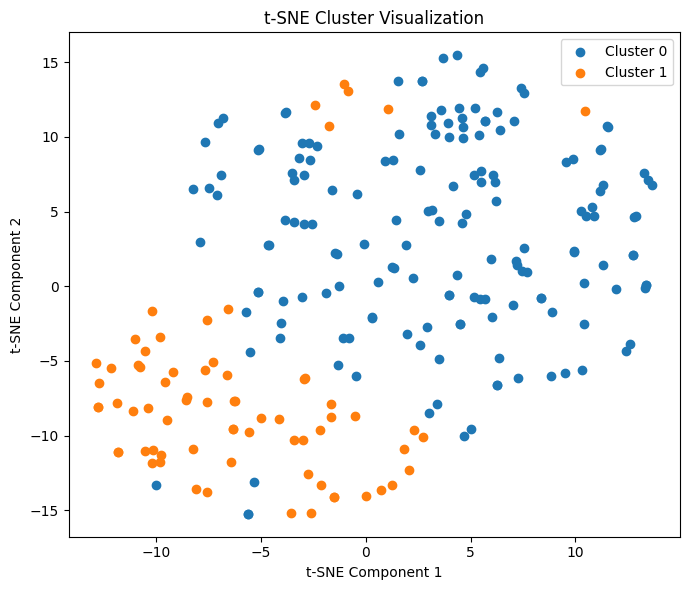

Birch Clustering :: NMI: 0.2769, ARI: 0.2851, SC: 0.1689


In [ ]:
from sklearn.cluster import Birch

# ---------- STEP 1: Setup RandomizedSearchCV for Birch Clustering ----------

param_dist = {
    'n_clusters': [2],
    'threshold': [0.001, 0.01, 0.05, 0.1, 0.5, 1],
    'branching_factor': [20, 50, 100, 200]
}

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

birch = Birch()

random_search = RandomizedSearchCV(
    birch,
    param_distributions=param_dist,
    n_iter=10,
    scoring=silhouette_scorer,
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# ---------- STEP 2: Fit Birch with best parameters ----------

best_model = Birch(
    n_clusters=best_params['n_clusters'],
    threshold=best_params['threshold'],
    branching_factor=best_params['branching_factor']
)

birch_labels = best_model.fit_predict(X_train)

# ---------- STEP 3: Evaluate Clustering ----------

contingency = plot_contingency_matrix(y_train, birch_labels)
sil_score = silhouette_score(X_train, birch_labels)
print(f"\nSilhouette Score: {sil_score:.4f}")

# ---------- STEP 4: t-SNE Visualization ----------

plot_tsne(X_train, birch_labels)

# ---------- STEP 5: Metric Evaluation ----------
calculate_scores(X_train, y_train, birch_labels, 'Birch Clustering')

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'n_components': 2, 'covariance_type': 'full'}


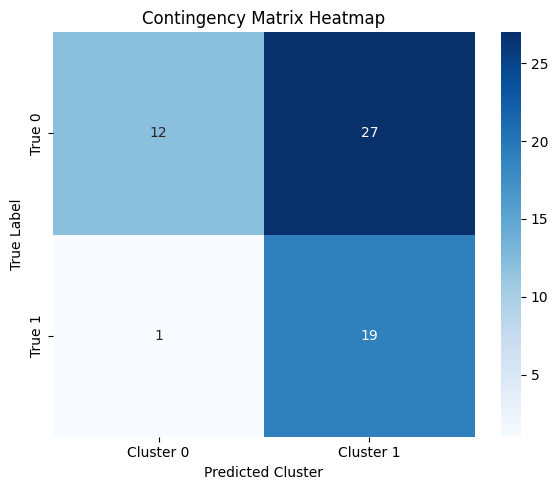


Silhouette Score: 0.1062


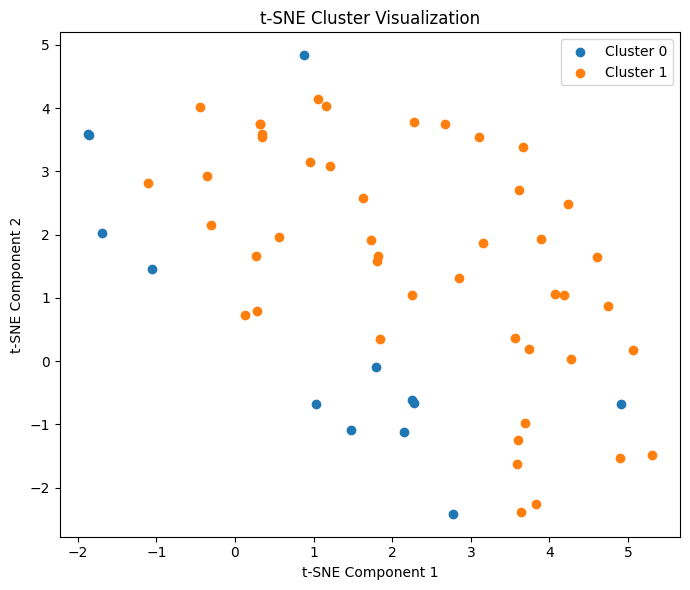

GMM :: NMI: 0.0891, ARI: -0.0423, SC: 0.1062


In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.metrics.cluster import contingency_matrix

# ---------- STEP 1: Setup RandomizedSearchCV for GMM ----------
param_grid = {
    'n_components': [2],  # Fixed to 2 for ASD vs non-ASD
    'covariance_type': ['full', 'tied', 'diag', 'spherical']
}

# Custom silhouette scorer
silhouette_scorer = make_scorer(silhouette_score, metric='euclidean')

gmm = GaussianMixture()

random_search = RandomizedSearchCV(
    gmm,
    param_distributions=param_grid,
    n_iter=10,
    scoring=silhouette_scorer,
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# ---------- STEP 2: Fit GMM with best parameters ----------
best_gmm = GaussianMixture(**best_params)
best_gmm.fit(X_train)
gaus_labels = best_gmm.predict(X_test)

# ---------- STEP 3: Evaluate Clustering ----------
contingency = plot_contingency_matrix(y_test, gaus_labels)
sil_score = silhouette_score(X_test, gaus_labels)
print(f"\nSilhouette Score: {sil_score:.4f}")

# ---------- STEP 4: t-SNE Visualization ----------
plot_tsne(X_test, gaus_labels)

# ---------- STEP 5: Score Metrics ----------
calculate_scores(X_test, y_test, gaus_labels, 'GMM')


In [ ]:
import pandas as pd
from sklearn.metrics import (
    normalized_mutual_info_score,
    adjusted_rand_score,
    silhouette_score,
    cohen_kappa_score
)
from sklearn.preprocessing import LabelEncoder

# Assuming y_train is currently of type object (string)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Encode y_train to numeric

# Container to store results
clustering_metrics = []

def clustering_report(model_name, X_data, y_true, y_pred):
    """
    Computes unsupervised clustering metrics and appends results to a list.
    """
    # Use the encoded y_train for metric calculations
    nmi = normalized_mutual_info_score(y_true, y_pred) * 100
    ari = adjusted_rand_score(y_true, y_pred) * 100
    sc = silhouette_score(X_data, y_pred, metric='euclidean') * 100


    clustering_metrics.append({
        "Model": model_name,
        "NMI (%)": round(nmi, 2),
        "ARI (%)": round(ari, 2),
        "Silhouette Score (%)": round(sc, 2),
    })

# ==== Call the report function for each clustering model ====
clustering_report("KMeans", X_train, y_train_encoded, kmeans_labels)
# Predict on the training data for the Gaussian Mixture Model
# Initialize best_gmm with only relevant parameters
best_gmm = GaussianMixture(n_components=2)  # You likely want 2 components for ASD vs non-ASD
best_gmm.fit(X_train)
gaus_labels_train = best_gmm.predict(X_train)  # Predict on training data
clustering_report("Gaussian", X_train, y_train_encoded, gaus_labels_train)  # Use train predictions
clustering_report("Agglomerative", X_train, y_train_encoded, agglo_labels)
clustering_report("Spectral", X_train, y_train_encoded, spectral_labels)
clustering_report("Birch", X_train, y_train_encoded, birch_labels)

# Convert to DataFrame and display
df_clustering_metrics = pd.DataFrame(clustering_metrics)
print(df_clustering_metrics)

           Model  NMI (%)  ARI (%)  Silhouette Score (%)
0         KMeans    61.60    68.48                 18.29
1       Gaussian    15.61    15.62                 15.65
2  Agglomerative    28.75    24.09                 17.47
3       Spectral    35.76    27.61                 19.31
4          Birch    27.69    28.51                 16.89
